K-Means

- csv 파일(데이터)을 넣어주면,
- 데이터를 그루핑(clustering) 해주는 앱
- 

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
df['Annual Income (k$)'].max()

137

In [5]:
df['Annual Income (k$)'] == df['Annual Income (k$)'].max()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198     True
199     True
Name: Annual Income (k$), Length: 200, dtype: bool

In [6]:
df.loc[df['Annual Income (k$)'] == df['Annual Income (k$)'].max(), ]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
198,199,Male,32,137,18
199,200,Male,30,137,83


In [7]:
df.loc[df['Spending Score (1-100)'] == df['Spending Score (1-100)'].max(), ]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
11,12,Female,35,19,99


In [8]:
df.loc[df['Age'] == df['Age'].max(), ]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
60,61,Male,70,46,56
70,71,Male,70,49,55


In [9]:
df.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


K-Means 는 비지도로 그룹으로 묶는거라 y(정답) 이 없다

In [12]:
X = df.iloc[ :, 1 : ]

X


,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [13]:
df['Genre'].nunique()

2

In [14]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder



In [15]:
label_encoder = LabelEncoder()

In [21]:
X['Genre'] = label_encoder.fit_transform(X['Genre'])

X

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [17]:
X.describe()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


In [18]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [19]:
scaler = MinMaxScaler()

In [32]:
X_scaled =scaler.fit_transform(X)
X_scaled

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00819672, 0.05102041],
       [0.        , 0.09615385, 0.00819672, 0.7755102 ],
       [0.        , 0.25      , 0.01639344, 0.39795918],
       [0.        , 0.07692308, 0.01639344, 0.76530612],
       [0.        , 0.32692308, 0.02459016, 0.05102041],
       [0.        , 0.09615385, 0.02459016, 0.94897959],
       [1.        , 0.88461538, 0.03278689, 0.02040816],
       [0.        , 0.23076923, 0.03278689, 0.7244898 ],
       [1.        , 0.94230769, 0.03278689, 0.13265306],
       [0.        , 0.32692308, 0.03278689, 1.        ],
       [0.        , 0.76923077, 0.04098361, 0.14285714],
       [0.        , 0.11538462, 0.04098361, 0.7755102 ],
       [1.        , 0.36538462, 0.04098361, 0.12244898],
       [1.        , 0.07692308, 0.04098361, 0.79591837],
       [0.        , 0.32692308, 0.04918033, 0.34693878],
       [1.        , 0.03846154,

In [23]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters=3, random_state=2)


In [26]:
X

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [33]:
y_pred = kmeans.fit_predict(X_scaled)

c:\Users\405\anaconda3\envs\app_dash\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 2, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 2, 0, 0, 0, 2, 1, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 0,
       0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 2, 1, 2, 0, 0, 2, 2, 2,
       2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 2, 1, 2, 1,
       0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 0, 0,
       2, 1, 2, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1,
       2, 1])

In [35]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,2
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [37]:
df['Group'] = y_pred

In [38]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,0
197,198,Male,32,126,74,1
198,199,Male,32,137,18,2


In [39]:
wcss = []
for k in range(1 , 10+1):

    kmeans = KMeans(n_clusters= k, random_state= 5, n_init='auto') # n_init='auto' 경고 안뜨게 함
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


In [40]:
wcss

[86.68148216035944,
 37.27227241211875,
 29.632334380252907,
 22.470436780237605,
 19.081722486105583,
 17.024810586072864,
 14.522587341466247,
 12.247907726470768,
 10.600432969550848,
 10.363482413214047]

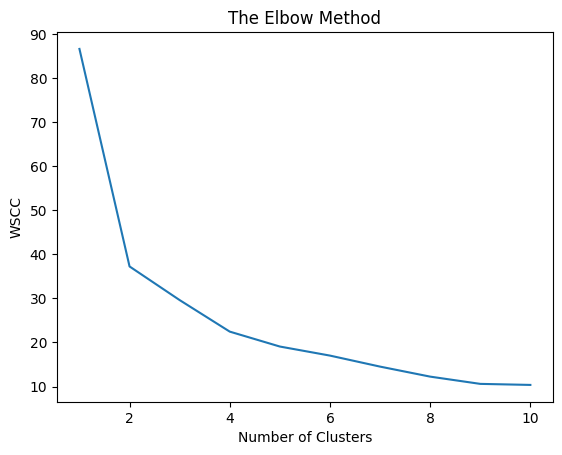

In [44]:
x = np.arange(1, 10+1)
plt.plot(x, wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WSCC')


plt.show()



In [47]:
kmeans = KMeans(n_clusters = 5, random_state= 5, n_init='auto')


In [48]:
y_pred = kmeans.fit_predict(X_scaled)



In [49]:
y_pred

array([0, 0, 3, 1, 1, 1, 3, 1, 2, 1, 2, 1, 3, 1, 2, 0, 3, 0, 2, 1, 0, 0,
       3, 0, 3, 0, 3, 0, 3, 1, 2, 1, 2, 0, 3, 1, 3, 1, 3, 1, 3, 0, 2, 1,
       3, 1, 3, 1, 1, 1, 3, 0, 1, 2, 3, 2, 3, 2, 1, 2, 2, 0, 3, 3, 2, 0,
       3, 3, 0, 1, 2, 3, 3, 3, 2, 0, 3, 0, 1, 3, 2, 0, 2, 3, 1, 2, 3, 1,
       1, 3, 3, 0, 2, 3, 1, 0, 3, 1, 2, 0, 1, 3, 2, 0, 2, 1, 3, 2, 2, 2,
       2, 1, 3, 0, 1, 1, 3, 3, 3, 3, 0, 3, 1, 0, 1, 1, 2, 0, 2, 0, 2, 0,
       1, 1, 0, 1, 3, 0, 0, 1, 3, 0, 1, 1, 0, 0, 2, 1, 3, 0, 2, 0, 3, 1,
       3, 1, 2, 1, 2, 1, 3, 1, 0, 1, 2, 1, 2, 1, 3, 0, 2, 0, 2, 0, 3, 1,
       2, 0, 2, 0, 3, 1, 2, 1, 3, 0, 3, 0, 3, 1, 3, 1, 2, 1, 3, 1, 3, 0,
       2, 0])

In [50]:
df['Group'] = y_pred

In [51]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,1
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,0
198,199,Male,32,137,18,2


In [52]:
df['Group'] == 3


0      False
1      False
2       True
3      False
4      False
       ...  
195    False
196     True
197    False
198    False
199    False
Name: Group, Length: 200, dtype: bool

In [55]:
df.loc[df['Group'] == 0, ]  # 그룹정보가 n 인사람 가져오기

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Group
0,1,Male,19,15,39,0
1,2,Male,21,15,81,0
15,16,Male,22,20,79,0
17,18,Male,20,21,66,0
20,21,Male,35,24,35,0
21,22,Male,25,24,73,0
23,24,Male,31,25,73,0
25,26,Male,29,28,82,0
27,28,Male,35,28,61,0
33,34,Male,18,33,92,0
